In [6]:
import pandas as pd
import numpy as np
import json
import os
os.curdir
dat=open("amsterdam.json")

dat=dat.read()

dat[0:100]
    

'{"host_listings_count":{"0":1.0,"1":1.0,"2":1.0,"3":2.0,"4":1.0,"5":1.0,"6":1.0,"7":1.0,"8":3.0,"9":'

In [7]:
data_json=json.loads(dat)


In [8]:
type(data_json)

dict

In [9]:
data_json.keys()

dict_keys(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'price', 'latitude', 'longitude', 'room_type', 'instant_bookable'])

In [10]:
print(data_json)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
hotels= pd.DataFrame.from_dict(data_json)

In [12]:
hotels.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


In [13]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15181 entries, 0 to 15180
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_listings_count             15178 non-null  float64
 1   accommodates                    15181 non-null  int64  
 2   bathrooms                       15163 non-null  float64
 3   bedrooms                        15169 non-null  float64
 4   guests_included                 15181 non-null  int64  
 5   minimum_nights                  15181 non-null  int64  
 6   number_of_reviews               15181 non-null  int64  
 7   calculated_host_listings_count  15181 non-null  int64  
 8   price                           15181 non-null  object 
 9   latitude                        15181 non-null  float64
 10  longitude                       15181 non-null  float64
 11  room_type                       15181 non-null  object 
 12  instant_bookable                15181

In [14]:
hotels.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,52.426224,5.027689


In [15]:
hotels.shape

(15181, 13)

In [16]:
hotels.bathrooms.describe()

count    15163.000000
mean         1.122832
std          0.356547
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

In [17]:
hotels.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [18]:
hotels.price.describe()

count       15181
unique        378
top       $100.00
freq          833
Name: price, dtype: object

In [19]:
hotels['price']=hotels['price'].str.replace('$',"")
hotels['price']=hotels['price'].str.replace(',',"")

In [20]:
pd.to_numeric(hotels['price'],downcast='unsigned')

0        145
1         88
2        130
3        110
4        115
        ... 
15176     80
15177    125
15178    435
15179     80
15180    200
Name: price, Length: 15181, dtype: uint16

In [21]:
hotels['price']=hotels['price'].astype(float)

In [22]:
round(hotels['price'].mean(),3)

134.799

In [23]:
round(hotels['price'].max(),1)

3142.0

In [24]:
round(hotels['price'].quantile(q=0.99),1)

440.0

In [25]:
index=hotels[hotels['price']>=440]

In [26]:
round(index['price'].quantile(q=0.90),1)

899.8

In [27]:
hotels.dropna().shape

(15148, 13)

In [28]:
hotels

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,Entire home/apt,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15176,2.0,4,1.5,1.0,2,1,0,1,80.0,52.391679,4.779126,Private room,t
15177,1.0,2,1.0,1.0,2,3,0,1,125.0,52.395505,4.878143,Entire home/apt,t
15178,6.0,16,2.0,0.0,10,2,0,1,435.0,52.426224,4.959300,Entire home/apt,t
15179,1.0,4,1.5,2.0,2,3,0,1,80.0,52.354298,4.974295,Entire home/apt,f


In [29]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [30]:
>>> lon1, lon2, lat1, lat2 = np.random.randn(4, 1000000)
>>> hotels["d_center"]= haversine_np(hotels['longitude'],hotels['latitude'],4.899431,52.379189)



In [31]:
hotels.sort_values('d_center',ascending=True).tail()


,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_center
6804,1.0,3,1.0,1.0,2,2,37,1,40.0,52.290687,4.983784,Private room,f,11.381113
6779,1.0,4,1.0,3.0,1,3,1,1,101.0,52.292209,4.989963,Entire home/apt,f,11.454847
6791,1.0,2,1.0,1.0,1,1,22,1,50.0,52.292890,4.995102,Private room,t,11.583068
6766,1.0,2,1.0,1.0,1,2,5,1,50.0,52.291664,4.992333,Private room,f,11.592780
6764,1.0,3,1.0,3.0,1,30,0,1,83.0,52.302752,5.020968,Entire home/apt,f,11.842162


In [32]:
round(hotels[hotels['d_center'] <= 1].groupby("room_type").agg({"price":np.mean}),1)

C:\Users\alwar\AppData\Local\Temp\ipykernel_20688\2223554294.py:1: FutureWarning: The provided callable <function mean at 0x000001E54BC07060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  round(hotels[hotels['d_center'] <= 1].groupby("room_type").agg({"price":np.mean}),1)


,price
room_type,
Entire home/apt,197.5
Private room,120.6
Shared room,90.2


In [33]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15181 entries, 0 to 15180
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_listings_count             15178 non-null  float64
 1   accommodates                    15181 non-null  int64  
 2   bathrooms                       15163 non-null  float64
 3   bedrooms                        15169 non-null  float64
 4   guests_included                 15181 non-null  int64  
 5   minimum_nights                  15181 non-null  int64  
 6   number_of_reviews               15181 non-null  int64  
 7   calculated_host_listings_count  15181 non-null  int64  
 8   price                           15181 non-null  float64
 9   latitude                        15181 non-null  float64
 10  longitude                       15181 non-null  float64
 11  room_type                       15181 non-null  object 
 12  instant_bookable                15181

In [34]:
X=pd.get_dummies(hotels)
X.shape


(15181, 17)

In [35]:
y=hotels['price']

In [36]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [37]:
abs(X_test['accommodates'].mean()-X_train['accommodates'].mean())
round

<function round(number, ndigits=None)>

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf=RandomForestClassifier(n_estimators=80,max_features='sqrt',oob_score=True,n_jobs=-1,random_state=200)

In [40]:
X_train.isnull().sum()

host_listings_count                2
accommodates                       0
bathrooms                         12
bedrooms                           9
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
d_center                           0
room_type_Entire home/apt          0
room_type_Private room             0
room_type_Shared room              0
instant_bookable_f                 0
instant_bookable_t                 0
dtype: int64

In [41]:
X_train['host_listings_count']=X_train['host_listings_count'].fillna(np.mean(X_train['host_listings_count']))
X_train['bathrooms']=X_train['bathrooms'].fillna(np.mean(X_train['bathrooms']))
X_train['bedrooms']=X_train['bedrooms'].fillna(np.mean(X_train['bedrooms']))
X_test['host_listings_count']=X_test['host_listings_count'].fillna(np.mean(X_test['host_listings_count']))
X_test['bathrooms']=X_test['bathrooms'].fillna(np.mean(X_test['bathrooms']))
X_test['bedrooms']=X_test['bedrooms'].fillna(np.mean(X_test['bedrooms']))


In [42]:
X_train.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
d_center                          0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
instant_bookable_f                0
instant_bookable_t                0
dtype: int64

In [43]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=200)

In [44]:
clf.oob_score_

0.6808770939205722

In [45]:
clf.score(X_test,y_test)

0.6996706915477497

In [46]:
for w in range(30,40,5):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

For n_estimators = 30
OOB score is 0.6203651421042725
************************
For n_estimators = 35
OOB score is 0.6341991341991342
************************


In [47]:
clf=RandomForestClassifier(n_estimators=330,oob_score=True,n_jobs=-1,random_state=200)

In [48]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=330, n_jobs=-1, oob_score=True,
                       random_state=200)

In [49]:
clf.oob_score_

0.7085450781102955

In [50]:
clf.feature_importances_

array([0.02352119, 0.0229533 , 0.01826426, 0.02120245, 0.02318095,
       0.04569056, 0.07752582, 0.02088059, 0.44256097, 0.09226566,
       0.09341747, 0.09179492, 0.00434465, 0.00380903, 0.00080199,
       0.00896396, 0.00882223])

In [51]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [52]:
imp_feat.sort_values(ascending=False)

price                             0.442561
longitude                         0.093417
latitude                          0.092266
d_center                          0.091795
number_of_reviews                 0.077526
minimum_nights                    0.045691
host_listings_count               0.023521
guests_included                   0.023181
accommodates                      0.022953
bedrooms                          0.021202
calculated_host_listings_count    0.020881
bathrooms                         0.018264
instant_bookable_f                0.008964
instant_bookable_t                0.008822
room_type_Entire home/apt         0.004345
room_type_Private room            0.003809
room_type_Shared room             0.000802
dtype: float64

<Axes: >

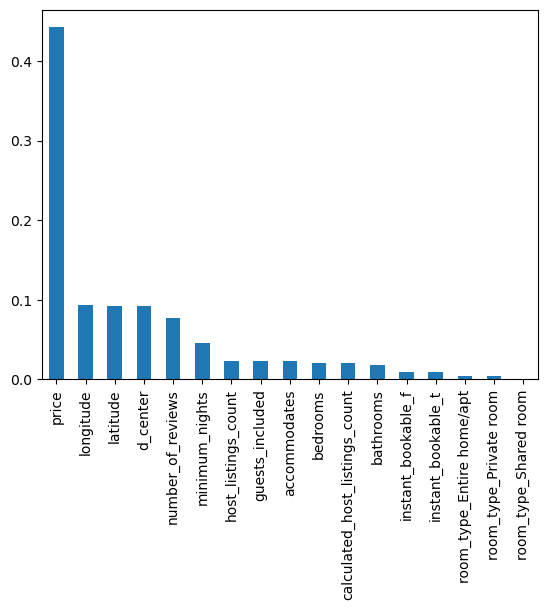

In [53]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [54]:
pred=clf.predict(X_test)

In [55]:
errors=abs(pred-y_test)

errors.quantile(q=0.7)

0.0

In [56]:
print('Metrics for Random Forest Trained on Original Data')

print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 6.01 degrees.
Accuracy: 97.05 %.


In [57]:
np.mean(mape)

2.9522049281687472

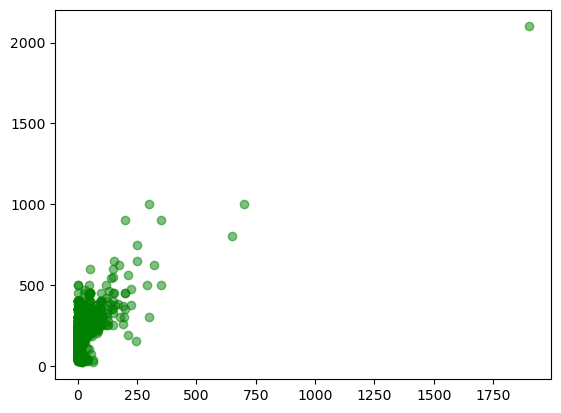

In [58]:


import matplotlib.pyplot as plt



plt.scatter(errors, y_test,color="green", alpha=0.5)

plt.show()